In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#import warnings
#warnings.filterwarnings('ignore')

#classificadores
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV

#separar dados de treino e teste
from sklearn.model_selection import train_test_split

# exibir metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

# vetorizador
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
base = pd.read_excel('dados2.xlsx', sheet_name='categorizado')

In [3]:
base.head()

,ClientID,GroupID,UrlDomain,CategorySitesID,UrlCompleta
0,109,17,abrace,4,109.17.abrace
1,109,1,access.redhat.com,1,109.1.access.redhat.com
2,109,1,account.activedirectory.windowsazure.com,1,109.1.account.activedirectory.windowsazure.com
3,109,5,account.activedirectory.windowsazure.com,1,109.5.account.activedirectory.windowsazure.com
4,109,8,account.activedirectory.windowsazure.com,1,109.8.account.activedirectory.windowsazure.com


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ClientID         3716 non-null   int64 
 1   GroupID          3716 non-null   int64 
 2   UrlDomain        3716 non-null   object
 3   CategorySitesID  3716 non-null   int64 
 4   UrlCompleta      3716 non-null   object
dtypes: int64(3), object(2)
memory usage: 145.3+ KB


In [6]:
base['UrlDomain'].value_counts()

accounts.google.com                  49
mail.google.com                      48
www.google.com                       45
google.com                           45
meet.google.com                      41
                                     ..
lacqueline                            1
odomedhomolog.topsaude.com.           1
xml                                   1
oficinadanet.com.br                   1
notadomilhao.prefeitura.sp.gov.br     1
Name: UrlDomain, Length: 1437, dtype: int64

In [7]:
base['UrlDomain'].str.lower().str.split()

0                                         [abrace]
1                              [access.redhat.com]
2       [account.activedirectory.windowsazure.com]
3       [account.activedirectory.windowsazure.com]
4       [account.activedirectory.windowsazure.com]
                           ...                    
3711                           [zapimoveis.com.br]
3712                                [zarpo.com.br]
3713                            [zonitshop.com.br]
3714                                     [zoom.us]
3715                                       [zumbi]
Name: UrlDomain, Length: 3716, dtype: object

In [8]:
base['UrlCompleta']

0                                        109.17.abrace
1                              109.1.access.redhat.com
2       109.1.account.activedirectory.windowsazure.com
3       109.5.account.activedirectory.windowsazure.com
4       109.8.account.activedirectory.windowsazure.com
                             ...                      
3711                          109.14.zapimoveis.com.br
3712                               109.14.zarpo.com.br
3713                           109.10.zonitshop.com.br
3714                                    109.13.zoom.us
3715                                      109.17.zumbi
Name: UrlCompleta, Length: 3716, dtype: object

In [9]:
categorias = base['CategorySitesID'].unique()

In [10]:
print(categorias)

[4 1 6 8 3 2 5]


In [11]:
X_treino, X_teste = train_test_split(base, test_size=0.2, random_state=42)

print(len(X_treino))
print(len(X_teste))

2972
744


In [12]:
y_treino = X_treino['CategorySitesID'].copy()
y_teste = X_teste['CategorySitesID'].copy()

In [13]:
print(y_treino)
print(y_teste)

1966    4
596     6
1694    2
2920    1
296     6
       ..
1130    1
1294    4
860     1
3507    4
3174    1
Name: CategorySitesID, Length: 2972, dtype: int64
3502    4
842     2
321     4
2351    2
1392    1
       ..
209     1
3361    4
1094    1
2226    6
2498    1
Name: CategorySitesID, Length: 744, dtype: int64


In [14]:
print(X_treino)
print(X_teste)

      ClientID  GroupID                  UrlDomain  CategorySitesID  \
1966       109       18                     musica                4   
596        109       19            crunchyroll.com                6   
1694       109        1           login.oracle.com                2   
2920       109       19      topsaudeh.gndi.com.br                1   
296        109       21        books.google.com.br                6   
...        ...      ...                        ...              ...   
1130       109        4  giusoaphml.unimed.coop.br                1   
1294       109        5                        how                4   
860        109        5           docs.telerik.com                1   
3507       109        9               www.bing.com                4   
3174       109        4                   unicnuvm                1   

                          UrlCompleta  
1966                    109.18.musica  
596            109.19.crunchyroll.com  
1694           109.1.login.

In [15]:
X_treino = X_treino['UrlCompleta'].copy()
X_teste = X_teste['UrlCompleta'].copy()

In [16]:
print(X_treino)
print(X_teste)

1966                      109.18.musica
596              109.19.crunchyroll.com
1694             109.1.login.oracle.com
2920       109.19.topsaudeh.gndi.com.br
296          109.21.books.google.com.br
                     ...               
1130    109.4.giusoaphml.unimed.coop.br
1294                          109.5.how
860              109.5.docs.telerik.com
3507                 109.9.www.bing.com
3174                     109.4.unicnuvm
Name: UrlCompleta, Length: 2972, dtype: object
3502                         109.5.www.bing.com
842                       109.2.docs.oracle.com
321                                    109.18.c
2351                109.10.pt.stackoverflow.com
1392    109.17.idealodontooauth.topsaude.com.br
                         ...                   
209                        109.1.aws.amazon.com
3361                         109.15.view-source
1094                  109.22.git.topdown.com.br
2226                       109.4.petlove.com.br
2498                  109.3.sac2.

In [17]:
txtvetorizador = TfidfVectorizer()
X_treino_vetor = txtvetorizador.fit_transform(X_treino)

In [18]:
print(X_treino_vetor)

  (0, 648)	0.9050683934116224
  (0, 11)	0.4110626375291437
  (0, 3)	0.10898950075529548
  (1, 212)	0.14182411531375347
  (1, 238)	0.8863360319400241
  (1, 12)	0.42767075023093987
  (1, 3)	0.10673372567838514
  (2, 701)	0.6163656492059453
  (2, 575)	0.7530814196284839
  (2, 212)	0.18387958035966984
  (2, 3)	0.13838374838120582
  (3, 132)	0.21113172863689653
  (3, 400)	0.459539741557818
  (3, 991)	0.7494914445573754
  (3, 212)	0.13084933485549222
  (3, 12)	0.3945762896603878
  (3, 3)	0.0984743460642684
  (4, 404)	0.2929360205695268
  (4, 130)	0.8370884919135578
  (4, 16)	0.3723695015061169
  (4, 132)	0.21612501369758982
  (4, 212)	0.13394393382057362
  (4, 3)	0.10080327352694217
  (5, 632)	0.9457526652225547
  (5, 132)	0.25671518206763283
  :	:
  (2965, 212)	0.12890244718697344
  (2965, 3)	0.0970091610082671
  (2966, 390)	0.6635960163549899
  (2966, 20)	0.5207382201353313
  (2966, 960)	0.4390124697345165
  (2966, 132)	0.2444924412817324
  (2966, 212)	0.1515247069943207
  (2966, 3)	0.1140

In [19]:
#gradiente descendente
modelo = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
modelo.fit(X_treino_vetor, y_treino)

SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)

In [20]:
X_teste_vetor = txtvetorizador.transform(X_teste)

In [21]:
previsao = modelo.predict(X_teste_vetor)

In [22]:
print(metrics.classification_report(y_teste.values, previsao))

print(categorias, modelo.classes_)

              precision    recall  f1-score   support

           1       0.84      0.87      0.85       373
           2       0.78      0.82      0.80        93
           3       0.89      1.00      0.94        17
           4       0.75      0.65      0.70       100
           5       1.00      1.00      1.00         9
           6       0.72      0.69      0.70       141
           8       1.00      0.91      0.95        11

    accuracy                           0.80       744
   macro avg       0.85      0.85      0.85       744
weighted avg       0.80      0.80      0.80       744

[4 1 6 8 3 2 5] [1 2 3 4 5 6 8]


Text(0.5, 0, 'Classificações')

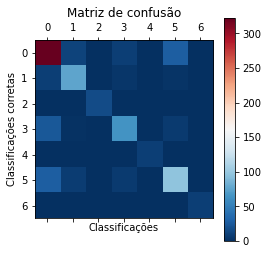

In [23]:
confusion_matrix = confusion_matrix(y_teste.values, previsao)
plt.matshow(confusion_matrix, cmap='RdBu_r')
plt.title("Matriz de confusão")
plt.colorbar()
plt.ylabel("Classificações corretas")
plt.xlabel("Classificações")

In [28]:
#navie bayes
MultiNB = MultinomialNB()
MultiNB.fit(X_treino_vetor, y_treino)

MultinomialNB()

In [29]:
previsaoNB = MultiNB.predict(X_teste_vetor)

In [30]:
print(metrics.classification_report(y_teste.values, previsaoNB))

print(categorias)

              precision    recall  f1-score   support

           1       0.61      0.93      0.74       373
           2       0.89      0.60      0.72        93
           3       0.00      0.00      0.00        17
           4       0.50      0.02      0.04       100
           5       0.00      0.00      0.00         9
           6       0.69      0.55      0.61       141
           8       0.00      0.00      0.00        11

    accuracy                           0.65       744
   macro avg       0.38      0.30      0.30       744
weighted avg       0.62      0.65      0.58       744

[4 1 6 8 3 2 5]


C:\Users\niciu\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niciu\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\niciu\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
confusion_matrix = confusion_matrix(y_teste.values, previsaoNB)
plt.matshow(confusion_matrix, cmap='RdBu_r')
plt.title("Matriz de confusão")
plt.colorbar()
plt.ylabel("Classificações corretas")
plt.xlabel("Classificações")

TypeError: 'numpy.ndarray' object is not callable

In [32]:
#svc
param_grid = [
    {'C': [1, 10, 100, 1000]}
]
svc = LinearSVC()
svm = GridSearchCV(svc, param_grid).fit(X_treino_vetor, y_treino)

C:\Users\niciu\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\niciu\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\niciu\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\niciu\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\niciu\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\niciu\AppData\Roaming\Python\Python38\sit

In [59]:
previsaoSVC = svm.predict(X_teste_vetor)

In [60]:
print(metrics.classification_report(y_teste.values, previsaoSVC))

print(categorias)

              precision    recall  f1-score   support

           1       0.83      0.86      0.85       373
           2       0.78      0.82      0.80        93
           3       0.94      1.00      0.97        17
           4       0.72      0.68      0.70       100
           5       1.00      1.00      1.00         9
           6       0.69      0.65      0.67       141
           8       1.00      0.91      0.95        11

    accuracy                           0.80       744
   macro avg       0.85      0.84      0.85       744
weighted avg       0.79      0.80      0.79       744

[4 1 6 8 3 2 5]


Text(0.5, 0, 'Classificações')

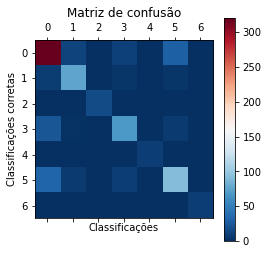

In [61]:
confusion_matrix = confusion_matrix(y_teste.values, previsaoSVC)
plt.matshow(confusion_matrix, cmap='RdBu_r')
plt.title("Matriz de confusão")
plt.colorbar()
plt.ylabel("Classificações corretas")
plt.xlabel("Classificações")

In [63]:
print('Accuracy')
print('Gradient = {}'.format(accuracy_score(y_teste.values, previsao)))
print('Navie = {}'.format(accuracy_score(y_teste.values, previsaoNB)))
print('SVC = {}'.format(accuracy_score(y_teste.values, previsaoSVC)))

Accuracy
Gradient = 0.8024193548387096
Navie = 0.646505376344086
SVC = 0.7956989247311828
